In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train=pd.read_csv("Data1.csv")
data_train.shape

(3333, 21)

In [3]:
data_train.shape

(3333, 21)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3333 non-null   int64  
 9   total day charge               3333 non-null   float64
 10  total eve minutes              3333 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3333 non-null   f

In [5]:
data_train = data_train.drop(['state', 'phone number','area code','number vmail messages','total day minutes'], axis = 1)

In [6]:
data_train.head(10)

,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,no,yes,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,118,yes,no,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,121,no,yes,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,147,yes,no,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,117,no,no,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,141,yes,yes,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [7]:
type('Loan')

str

In [8]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()
for column in data_train.columns:
    if type(column) == str:
        data_train[column] = Lb.fit_transform(data_train[column])
    else:
        data_train = data_train


In [9]:
data_train['international plan'] = data_train['international plan'] * data_train['number customer service calls']


In [10]:
data_train = pd.get_dummies(data=data_train)

In [11]:
data_train.head(10)


,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,126,0,1,70,1491,767,60,684,1184,49,657,79,3,79,1,0
1,105,0,1,83,667,748,64,668,1265,61,701,116,3,116,1,0
2,135,0,0,74,1362,158,71,150,443,62,292,101,5,101,0,0
3,82,2,0,31,1625,13,49,13,758,47,445,45,7,45,2,0
4,73,3,0,73,711,330,83,307,664,79,401,80,3,80,3,0
5,116,0,0,58,1208,982,62,870,820,76,475,42,6,42,0,0
6,119,0,1,48,1162,1604,69,1433,900,76,514,54,7,54,3,0
7,145,0,0,39,625,80,55,78,892,54,510,50,6,50,0,0
8,115,0,0,57,865,1607,41,1436,929,48,528,66,4,66,1,0
9,139,0,1,44,1455,995,72,882,1569,55,911,91,5,91,0,0


In [12]:
data_train.describe()

,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,99.005101,0.141914,0.276628,60.467447,826.339634,801.292529,61.132613,715.447645,793.796580,58.109511,463.044404,81.478548,4.479448,81.478548,1.562856,0.144914
std,39.589501,0.600589,0.447398,19.893502,417.413913,403.148568,19.806578,352.373293,399.771092,19.515154,209.589781,27.420275,2.461214,27.420275,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,0.000000,47.000000,508.000000,489.000000,48.000000,447.000000,484.000000,45.000000,312.000000,64.000000,3.000000,64.000000,1.000000,0.000000
50%,99.000000,0.000000,0.000000,61.000000,820.000000,804.000000,61.000000,717.000000,795.000000,58.000000,462.000000,82.000000,4.000000,82.000000,1.000000,0.000000
75%,125.000000,0.000000,1.000000,74.000000,1146.000000,1111.000000,75.000000,982.000000,1103.000000,71.000000,616.000000,100.000000,6.000000,100.000000,2.000000,0.000000
max,211.000000,9.000000,1.000000,118.000000,1666.000000,1610.000000,122.000000,1439.000000,1590.000000,119.000000,932.000000,161.000000,20.000000,161.000000,9.000000,1.000000


In [13]:
X_train = data_train.iloc[:,:-1].values


In [14]:
y_train = data_train.iloc[:, -1:].values

In [15]:
data_train.shape

(3333, 16)

In [16]:
data_test = pd.read_csv("Data.csv")
data_test.shape

(1667, 21)

In [17]:
data_test = data_test.drop(['state', 'phone number','area code','number vmail messages','total day minutes'], axis = 1)

In [18]:
data_test.shape


(1667, 16)

In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account length                 1667 non-null   int64  
 1   international plan             1667 non-null   object 
 2   voice mail plan                1667 non-null   object 
 3   total day calls                1667 non-null   int64  
 4   total day charge               1667 non-null   float64
 5   total eve minutes              1667 non-null   float64
 6   total eve calls                1667 non-null   int64  
 7   total eve charge               1667 non-null   float64
 8   total night minutes            1667 non-null   float64
 9   total night calls              1667 non-null   int64  
 10  total night charge             1667 non-null   float64
 11  total intl minutes             1667 non-null   float64
 12  total intl calls               1667 non-null   i

In [20]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()
for column in data_test:
    if type(column) == str:
        data_test[column] = Lb.fit_transform(data_test[column])
    else:
        data_test = data_test

In [21]:
data_train['international plan'] = data_train['international plan'] * data_train['number customer service calls']


In [22]:
data_test = pd.get_dummies(data=data_test)

In [23]:
data_test.head(3)

,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,97,0,0,78,27,629,26,567,801,33,518,77,3,77,3,0
1,133,0,0,41,834,851,92,769,23,41,23,66,7,66,0,0
2,99,0,1,50,1070,805,58,729,1053,87,705,108,6,108,1,0


In [24]:
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

In [25]:
X_test.shape, y_test.shape

((1667, 15), (1667,))

In [26]:
import seaborn as sns

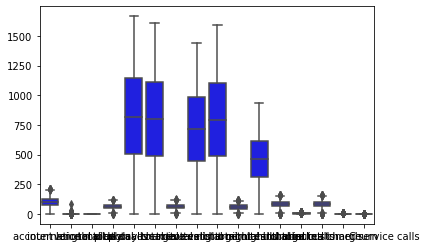

In [28]:
sns.boxplot(data = data_train, color = 'b')
#To plot the graph for the given data to be tarined.

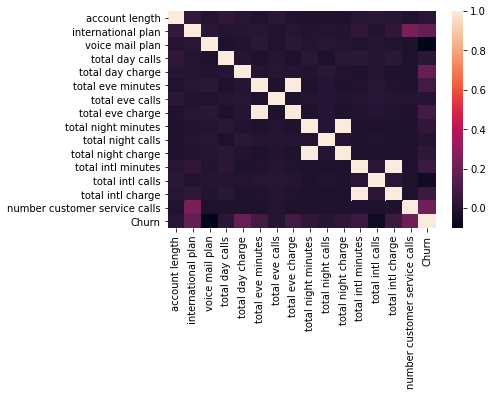

In [29]:
sns.heatmap(data_train.corr())
#To find the co-realation between the columns.

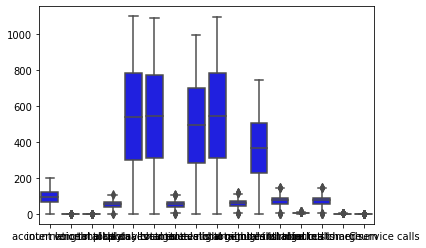

In [31]:
sns.boxplot(data = data_test, color = 'b')
#To plot the graph for the given data to be tested.

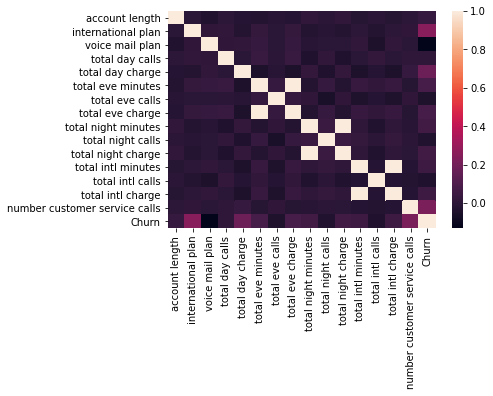

In [32]:
sns.heatmap(data_test.corr())
#To find the co-realation between the columns.

In [33]:
data_train.corr()

,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
account length,1.000000,0.048578,0.003580,0.038591,0.009947,-0.006886,0.018879,-0.006826,-0.011413,-0.013412,-0.010767,0.011617,0.020957,0.011617,-0.003726,0.016290
international plan,0.048578,1.000000,0.018900,0.003164,0.009395,0.011226,-0.004110,0.011355,-0.002589,0.001180,-0.002850,0.034558,0.000687,0.034558,0.233976,0.180276
voice mail plan,0.003580,0.018900,1.000000,-0.011802,0.000885,0.021081,-0.007155,0.020939,0.004491,0.015538,0.004651,-0.002134,0.007618,-0.002134,-0.017824,-0.102148
total day calls,0.038591,0.003164,-0.011802,1.000000,0.006282,-0.020171,0.009561,-0.020281,0.021035,-0.019887,0.022056,0.021547,0.003298,0.021547,-0.018440,0.019764
total day charge,0.009947,0.009395,0.000885,0.006282,1.000000,0.006508,0.016374,0.006384,-0.001588,0.021463,-0.001222,-0.012286,0.002834,-0.012286,-0.015208,0.187623
total eve minutes,-0.006886,0.011226,0.021081,-0.020171,0.006508,1.000000,-0.014171,0.999931,-0.013617,0.005772,-0.013860,-0.005666,0.010209,-0.005666,-0.015467,0.090260
total eve calls,0.018879,-0.004110,-0.007155,0.009561,0.016374,-0.014171,1.000000,-0.014517,0.001788,0.007204,0.000596,0.008389,0.018021,0.008389,0.002560,0.008519
total eve charge,-0.006826,0.011355,0.020939,-0.020281,0.006384,0.999931,-0.014517,1.000000,-0.013596,0.005808,-0.013843,-0.006346,0.009785,-0.006346,-0.015511,0.090443
total night minutes,-0.011413,-0.002589,0.004491,0.021035,-0.001588,-0.013617,0.001788,-0.013596,1.000000,0.008325,0.998611,-0.015895,-0.012493,-0.015895,-0.010831,0.036105
total night calls,-0.013412,0.001180,0.015538,-0.019887,0.021463,0.005772,0.007204,0.005808,0.008325,1.000000,0.009102,-0.012922,0.000512,-0.012922,-0.012514,0.006120


In [34]:


data_test.corr()



,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
account length,1.000000,-0.006545,-0.029836,0.005268,-0.019191,-0.021057,-0.009595,-0.020691,0.018863,-0.000093,0.017837,-0.014125,-0.001049,-0.014125,0.003255,0.030077
international plan,-0.006545,1.000000,0.014308,0.015407,-0.024753,0.026591,-0.004614,0.026542,-0.021561,-0.008431,-0.022313,0.002402,-0.022646,0.002402,0.011684,0.257202
voice mail plan,-0.029836,0.014308,1.000000,0.014410,0.016736,0.029908,-0.004407,0.029936,-0.007776,-0.005368,-0.005524,0.015155,-0.043919,0.015155,-0.006298,-0.131207
total day calls,0.005268,0.015407,0.014410,1.000000,-0.003852,0.037717,-0.000948,0.038154,-0.034774,0.015476,-0.034563,-0.004437,0.022421,-0.004437,0.007146,0.008264
total day charge,-0.019191,-0.024753,0.016736,-0.003852,1.000000,-0.047087,-0.010131,-0.046862,0.022129,-0.035034,0.022672,-0.043909,-0.019562,-0.043909,0.032083,0.178177
total eve minutes,-0.021057,0.026591,0.029908,0.037717,-0.047087,1.000000,0.027924,0.999957,-0.023923,0.029120,-0.024865,0.034738,0.017914,0.034738,-0.014841,0.077253
total eve calls,-0.009595,-0.004614,-0.004407,-0.000948,-0.010131,0.027924,1.000000,0.027961,0.014115,-0.055256,0.013768,-0.040340,-0.017695,-0.040340,0.014208,-0.038962
total eve charge,-0.020691,0.026542,0.029936,0.038154,-0.046862,0.999957,0.027961,1.000000,-0.023758,0.029179,-0.024700,0.034487,0.017971,0.034487,-0.015104,0.077573
total night minutes,0.018863,-0.021561,-0.007776,-0.034774,0.022129,-0.023923,0.014115,-0.023758,1.000000,0.042332,0.999032,0.006872,-0.033880,0.006872,-0.008122,0.064972
total night calls,-0.000093,-0.008431,-0.005368,0.015476,-0.035034,0.029120,-0.055256,0.029179,0.042332,1.000000,0.043182,0.025830,-0.002378,0.025830,0.000630,-0.033623


In [35]:
#Scaling of data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred = Dtc.predict(X_test)

# Cross Validation K folds

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(Dtc,X_train, y_train ,cv = 40, n_jobs=-1).mean()

0.9370051635111876

# missclassification

In [40]:
print("missclassification:-", (y_pred != y_test).sum())

missclassification:- 177


# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1399,   44],
       [ 133,   91]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8938212357528494

In [44]:
accuracy_score(Dtc.predict(X_train), y_train)

0.9540954095409541

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Accu, Miss = [], []
ith,TAccu = [], []
Err, TErr = [], []
n = int(input("enter the number of the Best max_Depth:->>")) 
for i in range(1, n): #ITERATIONS OF THE DATA
    ith.append(i)
    classifier = DecisionTreeClassifier(max_depth = i)
    classifier.fit(X_train,y_train) #FITTING THE DATA
    y_pred = classifier.predict(X_test) #PREDICTING THE DATA
    Miss.append((y_test != y_pred).sum()) #FINDING MISSCLASSIIFCATION OF THE DATA
    Accu.append(accuracy_score(y_test,y_pred)) #APPENDING THE ACCURACY SCORE OF THE DATA
    TAccu.append(accuracy_score(y_train, classifier.predict(X_train)))#Training accuracy of the data
    error = 1 - (accuracy_score(y_test,y_pred)) #Erroe for the testing accuracy 
    Err.append(error) #Error
    terror = 1 - accuracy_score(y_train, classifier.predict(X_train)) #ERROR for training accuracy
    TErr.append(terror) #Training Error

enter the number of the Best max_Depth:->>20


In [46]:
ma = Accu.index(max(Accu)) #INDEX OF MAX ACCURACY VALUE
mis = Miss[ma] #MISSCLASSIFICATION OF THE INDEX OF THE DATA

In [47]:
print("============================Testing ACCURACIES=====================================================")
print("All accuracies of the data:-", Accu)
print("===========================MissClassification======================================================")
print("All Missclassifion of the data:-", Miss)
print("===========================Ith-Iteration===========================================================")
print("ith values :-", ith)
print("===========================Training Accuracy=======================================================")
print("Training Accuracy of the data:-", TAccu)
print("===========================Testing Error===========================================================")
print("Training Error of the data:-", Err)
print("===========================Training Error==========================================================")
print("Training Accuracy of the data:-", TErr)

============================Testing ACCURACIES=====================================================
All accuracies of the data:- [0.865626874625075, 0.8620275944811038, 0.8812237552489502, 0.8914217156568687, 0.8998200359928015, 0.8926214757048591, 0.8926214757048591, 0.8932213557288542, 0.8944211157768446, 0.8932213557288542, 0.8890221955608878, 0.8890221955608878, 0.8872225554889022, 0.8770245950809838, 0.8758248350329934, 0.8770245950809838, 0.8758248350329934, 0.8740251949610078, 0.8764247150569886]
===========================MissClassification======================================================
All Missclassifion of the data:- [224, 230, 198, 181, 167, 179, 179, 178, 176, 178, 185, 185, 188, 205, 207, 205, 207, 210, 206]
===========================Ith-Iteration===========================================================
ith values :- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
===========================Training Accuracy====================================

In [48]:
print("============================Testing ACCURACIES=====================================================")
print("All accuracies of the data:-", max(Accu))
print("===========================MissClassification======================================================")
print("All Missclassifion of the data:-", min(Miss))
print("===========================Ith-Iteration===========================================================")
print("ith values :-", ith)
print("===========================Training Accuracy=======================================================")
print("Training Accuracy of the data:-", max(TAccu))
print("===========================Testing Error===========================================================")
print("Training Error of the data:-", min(Err))
print("===========================Training Error==========================================================")
print("Training Accuracy of the data:-", min(TErr))

============================Testing ACCURACIES=====================================================
All accuracies of the data:- 0.8998200359928015
===========================MissClassification======================================================
All Missclassifion of the data:- 167
===========================Ith-Iteration===========================================================
ith values :- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
===========================Training Accuracy=======================================================
Training Accuracy of the data:- 1.0
===========================Testing Error===========================================================
Training Error of the data:- 0.10017996400719853
===========================Training Error==========================================================
Training Accuracy of the data:- 0.0


In [49]:
import matplotlib.pyplot as plt

# Plotting Accuracies

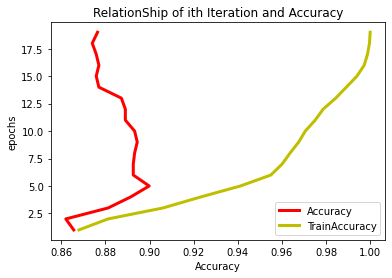

In [50]:
plt.plot(Accu, ith, c = 'r', lw = 3,label='Accuracy' )
plt.plot(TAccu, ith, c = 'y',lw = 3, label = "TrainAccuracy")
plt.title("RelationShip of ith Iteration and Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("epochs")
plt.legend()
plt.show()



# plotting Error

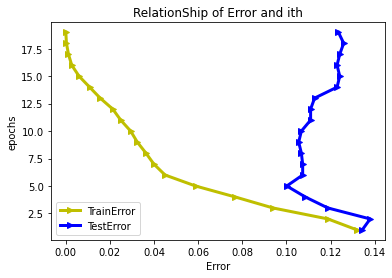

In [51]:
plt.plot(TErr, ith, c = 'y',lw = 3, label = "TrainError", marker = ">")
plt.plot(Err, ith, c = 'b',lw = 3, label = "TestError", marker = ">")
plt.title("RelationShip of Error and ith")
plt.xlabel("Error")
plt.ylabel("epochs")
plt.legend()
plt.show()

# plotting missiclassification

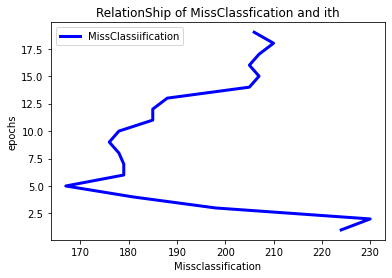

In [52]:
plt.plot(Miss, ith, c = 'b',lw = 3,label = 'MissClassiification')
plt.title("RelationShip of MissClassfication and ith")
plt.xlabel("Missclassification")
plt.ylabel("epochs")
plt.legend()
plt.show()

